<a href="https://colab.research.google.com/github/Keerthana0309/MLP-digits-recognition-using-Tensorflow-and-Keras/blob/master/MLP_digits_recognition_using_Tensorflow_and_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Modules**

In [1]:
from __future__ import absolute_import,unicode_literals,division,\
                        print_function 
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

print(tf.version.VERSION)

2.3.0


**Load the MNIST data**

In [4]:
mnist = tf.keras.datasets.mnist
(x_train,y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
print(x_train.shape, x_test.shape, x_train.ndim)
print(x_train.dtype, x_train.size)

(60000, 28, 28) (10000, 28, 28) 3
float64 47040000


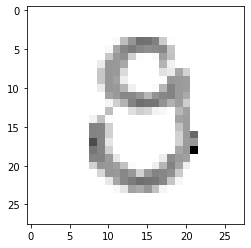

In [6]:
plt.imshow(x_train[80], cmap=plt.cm.binary)

**Setting a MLP model**

In [7]:
MLP = tf.keras.models.Sequential()  # feed forwrd types of nets
MLP.add(tf.keras.layers.Flatten())  # input layer: insteed of 28 by 28 
                                      # we use one-dimentional array
MLP.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 1st hidden layer: 
                               #128 neurons on this layer, densily connected
MLP.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 2nd hidden layer: 
                               #128 neurons on this layer, densily connected
MLP.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # oupt layer: 
                               #10 neurons for 10 digits, densily connected

**Train the MLP model**

In [9]:
MLP.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
MLP.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9240
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1057 - accuracy: 0.9675
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0702 - accuracy: 0.9774


In [10]:
MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (32, 784)                 0         
_________________________________________________________________
dense (Dense)                (32, 128)                 100480    
_________________________________________________________________
dense_1 (Dense)              (32, 128)                 16512     
_________________________________________________________________
dense_2 (Dense)              (32, 10)                  1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


**Evaluating the trained MLP model for predictions**

In [11]:
train_loss, train_acc = MLP.evaluate(x_train,y_train, verbose=2)
print('For training data, loss=',train_loss,' accuracy=',train_acc)
test_loss, test_acc = MLP.evaluate(x_test, y_test, verbose=2)
print('For test data, loss=',test_loss,' accuracy=',test_acc)

1875/1875 - 2s - loss: 0.0451 - accuracy: 0.9859
For training data, loss= 0.045111797749996185  accuracy= 0.9858999848365784
313/313 - 0s - loss: 0.0897 - accuracy: 0.9735
For test data, loss= 0.08965188264846802  accuracy= 0.9735000133514404


Predicted digit: 4
The actual label: 4
The actual image:


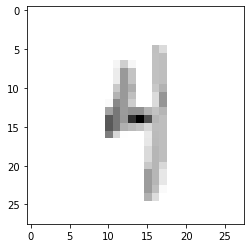

In [14]:
MLPpred_test = MLP.predict(x_test)   #do the prediction  
print('Predicted digit:',np.argmax(MLPpred_test[65]))
print('The actual label:',y_test[65]) 
print('The actual image:')
plt.imshow(x_test[65],cmap=plt.cm.binary)
plt.show() 

Predicted digit: 2
The actual label: 2
The actual image:


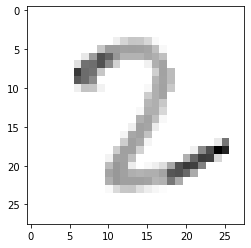

In [15]:
MLPpred_test = MLP.predict(x_test)   #do the prediction  
print('Predicted digit:',np.argmax(MLPpred_test[867]))
print('The actual label:',y_test[867]) 
print('The actual image:')
plt.imshow(x_test[867],cmap=plt.cm.binary)
plt.show() 

Predicted digit: 3
The actual label: 3
The actual image:


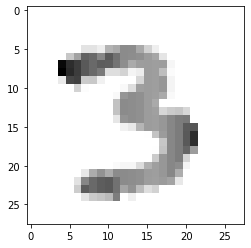

In [16]:
MLPpred_test = MLP.predict(x_test)   #do the prediction  
print('Predicted digit:',np.argmax(MLPpred_test[500]))
print('The actual label:',y_test[500]) 
print('The actual image:')
plt.imshow(x_test[500],cmap=plt.cm.binary)
plt.show() 

**The accuracy is 97% on this MNIST test dataset, which is among the best models of all the different types of models we have trained so far.**
